# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 573


In [5]:
# Set units
units = "metric"


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapuskasing
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | mount isa
Processing Record 8 of Set 1 | flying fish cove
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | maragogi
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | port mathurin
Processing Record 14 of Set 1 | mahibadhoo
Processing Record 15 of Set 1 | anadyr
Processing Record 16 of Set 1 | kohlu
Processing Record 17 of Set 1 | st. john's
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | nova sintra
Processing Record 21 of Set 1 | carnarvon
Processing Record 22 of Set 1 | ribeir

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapuskasing,49.4169,-82.4331,1.05,100,100,6.69,CA,1731541667
1,puerto natales,-51.7236,-72.4875,7.83,64,6,2.88,CL,1731541669
2,ushuaia,-54.8000,-68.3000,11.81,40,75,6.17,AR,1731541510
3,bilibino,68.0546,166.4372,-28.83,100,87,0.26,RU,1731541671
4,port-aux-francais,-49.3500,70.2167,4.23,89,100,13.62,TF,1731541672


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapuskasing,49.4169,-82.4331,1.05,100,100,6.69,CA,1731541667
1,puerto natales,-51.7236,-72.4875,7.83,64,6,2.88,CL,1731541669
2,ushuaia,-54.8000,-68.3000,11.81,40,75,6.17,AR,1731541510
3,bilibino,68.0546,166.4372,-28.83,100,87,0.26,RU,1731541671
4,port-aux-francais,-49.3500,70.2167,4.23,89,100,13.62,TF,1731541672


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

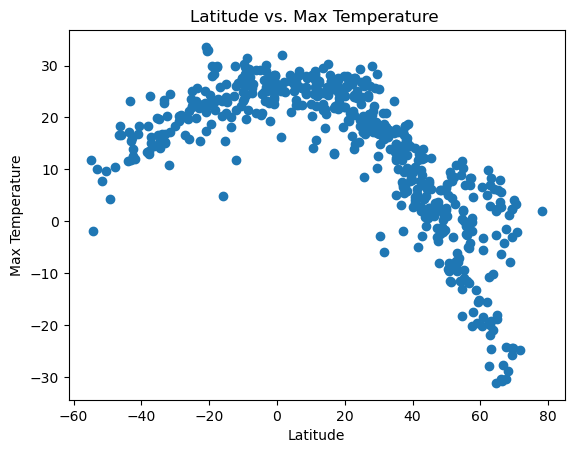

In [11]:
# Build scatter plot for latitude vs. temperature
lat_graph = city_data_df["Lat"]
max_tempsgraph = city_data_df["Max Temp"]
plt.scatter(lat_graph,max_tempsgraph,label="Cities")

# Incorporate the other graph properties
plt.title(f"Latitude vs. Max Temperature ")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

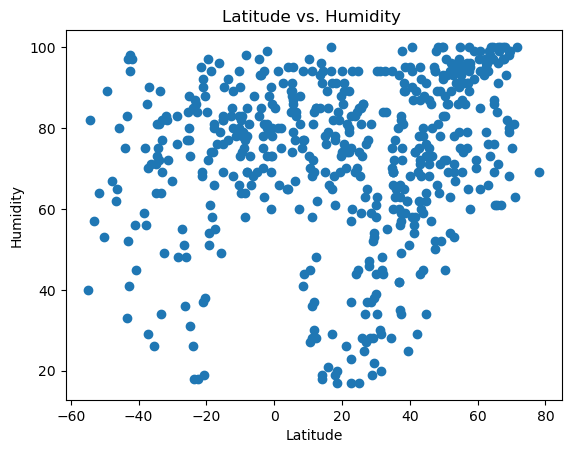

In [12]:
# Build the scatter plots for latitude vs. humidity
lat_graph = city_data_df["Lat"]
humidity_graph = city_data_df["Humidity"]
plt.scatter(lat_graph,humidity_graph,label="Cities")
# Incorporate the other graph properties
plt.title(f"Latitude vs. Humidity ")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
# Save the figure

plt.savefig("output_data/Fig2.png")

# Show plot

plt.show()

#### Latitude Vs. Cloudiness

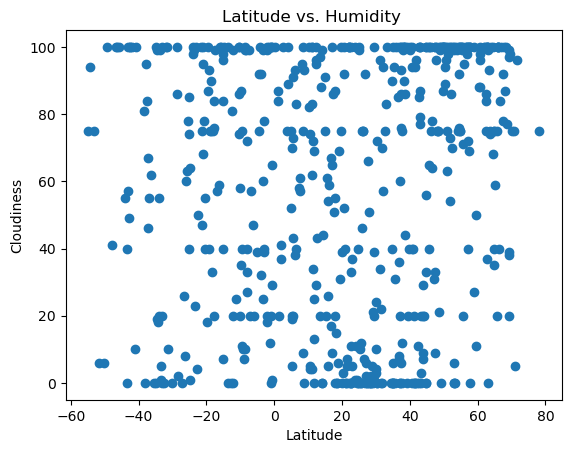

In [13]:
# Build the scatter plots for latitude vs. cloudiness
lat_graph = city_data_df["Lat"]
cloudiness_graph = city_data_df["Cloudiness"]
plt.scatter(lat_graph,cloudiness_graph,label="Cities")

# Incorporate the other graph properties
plt.title(f"Latitude vs. Humidity ")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

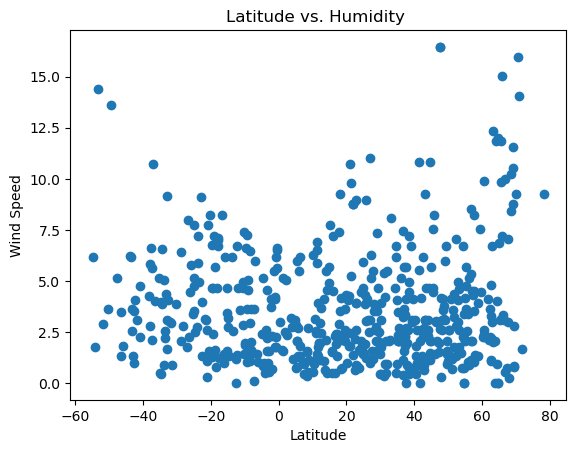

In [14]:
# Build the scatter plots for latitude vs. wind speed
lat_graph = city_data_df["Lat"]
windspeed_graph = city_data_df["Wind Speed"]
plt.scatter(lat_graph,windspeed_graph,label="Cities")

# Incorporate the other graph properties
plt.title(f"Latitude vs. Humidity ")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)   
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(line_eq, text_coordinates, fontsize=20, color="red")
    print(f"The r-squared is: {r_value**2}")

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapuskasing,49.4169,-82.4331,1.05,100,100,6.69,CA,1731541667
3,bilibino,68.0546,166.4372,-28.83,100,87,0.26,RU,1731541671
11,tiksi,71.6872,128.8694,-24.85,100,96,1.64,RU,1731541679
13,mahibadhoo,3.7833,72.9667,28.26,65,75,3.19,MV,1731541682
14,anadyr,64.7500,177.4833,-2.72,86,40,12.00,RU,1731541683


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere = city_data_df.loc[city_data_df["Lat"] < 0]
southern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto natales,-51.7236,-72.4875,7.83,64,6,2.88,CL,1731541669
2,ushuaia,-54.8000,-68.3000,11.81,40,75,6.17,AR,1731541510
4,port-aux-francais,-49.3500,70.2167,4.23,89,100,13.62,TF,1731541672
5,grytviken,-54.2811,-36.5092,-1.90,82,94,1.75,GS,1731541673
6,mount isa,-20.7333,139.5000,32.87,19,78,7.72,AU,1731541572


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7274665771218399


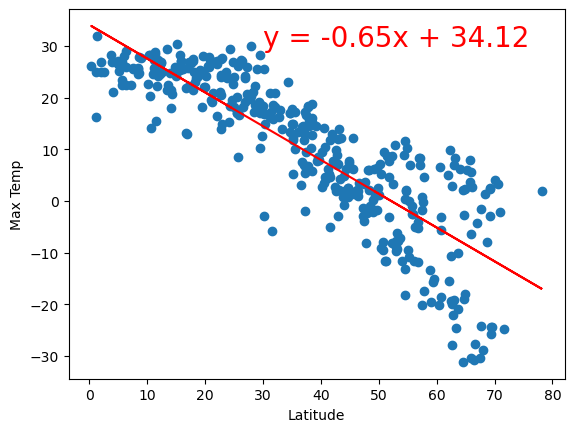

In [45]:
# Linear regression on Northern Hemisphere
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]
plot_linear_regression(x_values, y_values, title=
'Linear Regression on the Northern Hemisphere for Maximum Temperature', y_label='Max Temp', text_coordinates=(30,30))


The r-squared is: 0.5139926471951


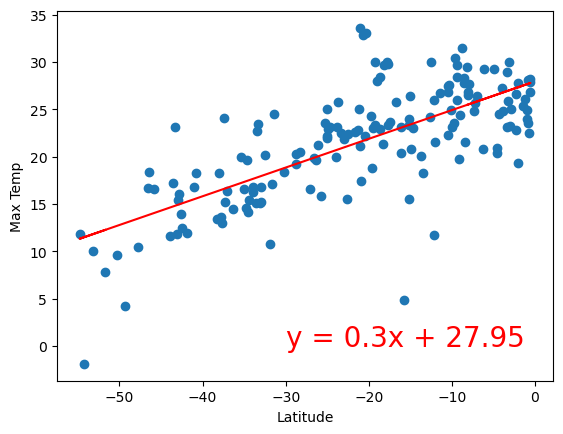

In [48]:
# Linear regression on Southern Hemisphere
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]
plot_linear_regression(x_values, y_values, title=
'Linear Regression on the Northern Hemisphere for Maximum Temperature', y_label='Max Temp', text_coordinates=(-30,0))

**Discussion about the linear relationship:** Both the northern and southern hempisphere show a significant correlation in lattitude and maximum tempterature. With the north the more the lattitude drops the more the higher the temperature gets. With the south the more the lattitude increases the higher the temperature gets. Both of these make sense because with the north the more the lattitude drops the closer to the equator the city is. Where as for the south the closer to the equator the city is the more the lattitude increases. Finally the northern hempishere has a decently more stronger correlation of max temperature to lattitude then the southern one does.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.08660663273916572


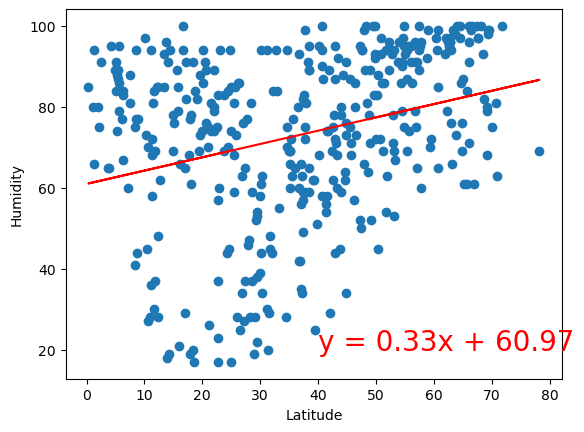

In [53]:
# Northern Hemisphere
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
plot_linear_regression(x_values, y_values, title=
'Linear Regression on the Northern Hemisphere for Maximum Temperature', y_label='Humidity', text_coordinates=(40,20))

The r-squared is: 0.07101508513405913


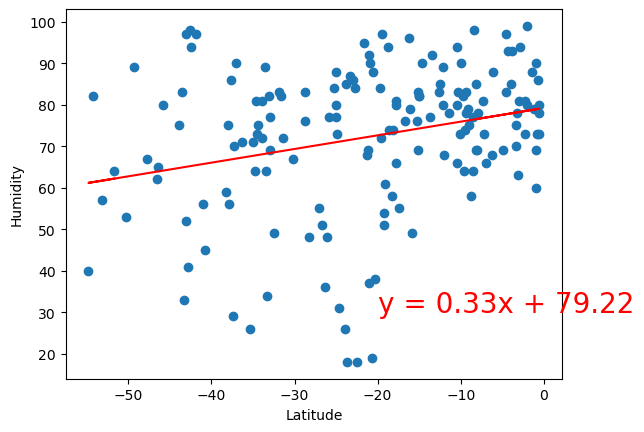

In [56]:
# Southern Hemisphere
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
plot_linear_regression(x_values, y_values, title=
'Linear Regression on the Northern Hemisphere for Maximum Temperature', y_label='Humidity', text_coordinates=(-20,30))

**Discussion about the linear relationship:** Both the summer and northern hemisphere show some correaltion between lattitude and and humidity. The correlation is very similar for both hemispheres. The one really interesting thing to note is for the Southern hempishere the correlation is much higher near the equator. Where as for the Northern hempishere it is much higher away from the equator. With humidity increasing in Southern  hempishere as the cities move towards the equator. In the Northern hempishere the humidity increases as cities move away from the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0777809451943208


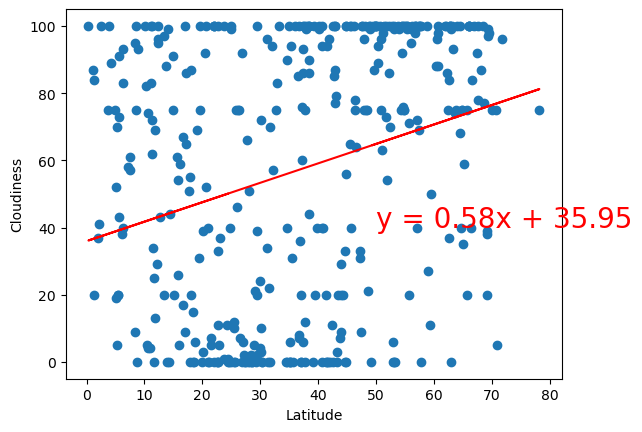

In [57]:
# Northern Hemisphere

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
plot_linear_regression(x_values, y_values, title=
'Linear Regression on the Northern Hemisphere for Maximum Temperature', y_label='Cloudiness', text_coordinates=(50,40))

The r-squared is: 0.00021245881120892458


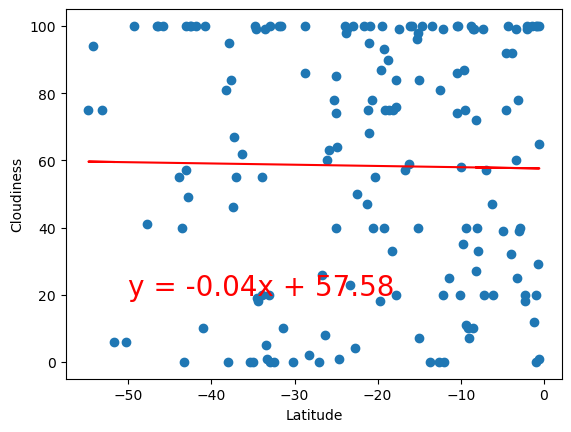

In [59]:
# Southern Hemisphere
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
plot_linear_regression(x_values, y_values, title=
'Linear Regression on the Northern Hemisphere for Maximum Temperature', y_label='Cloudiness', text_coordinates=(-50,20))

**Discussion about the linear relationship:** The Southern and Northern Hempisphere are very different in correlation in this particualr instance. The Southern hempishere has almost no correlation between cloudiness and lattitude. Where the Northern hemisphere has a somewhat significant correlation with cloudiness increasing as the lattitude i

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.044970439785388734


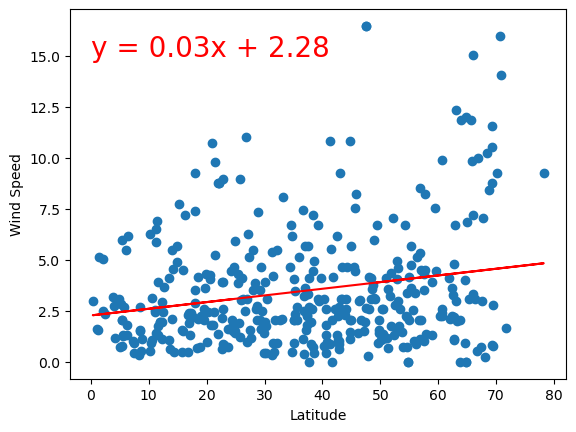

In [61]:
# Northern Hemisphere
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
plot_linear_regression(x_values, y_values, title=
'Linear Regression on the Northern Hemisphere for Maximum Temperature', y_label='Wind Speed', text_coordinates=(0,15.0))

The r-squared is: 0.03844486340054345


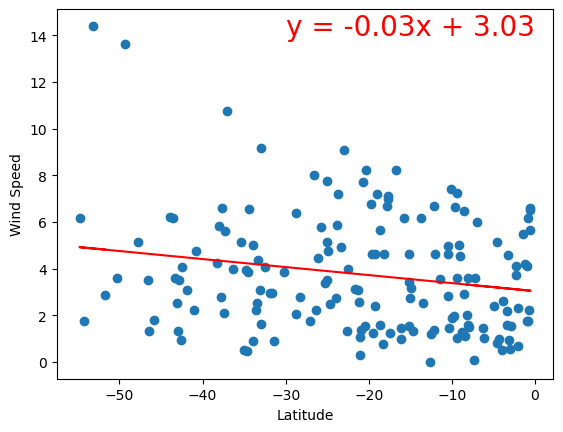

In [63]:
# Southern Hemisphere
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
plot_linear_regression(x_values, y_values, title=
'Linear Regression on the Northern Hemisphere for Maximum Temperature', y_label='Wind Speed', text_coordinates=(-30,14))

**Discussion about the linear relationship:** Lattitude and Wind Speed have some but not much correlation on both hemispheres. In both cases the wind speed increases as the cities move away from the equator.